# Statistical Analysis
### Fall 2020

In [2]:
# Run this cell to make sure you have the requirements 
# It should return 0. Then, comment it out. 

import os 
os.system("pip3 install -r requirements.txt")

0

### Major Topics:
* Inference
  - Estimation
  - Confidence Intervals
  - Central Limit Theorem
  - Benefits of Large Sample Sizes
* Hypothesis Testing
* Regression

# Inference 
## Estimation
When conducting data analysis, one is often interested in a phenomenon of interest. They might want to know the average amount of water that Harvard students drink each day, the maximal number of trips to Mount Auburn that each Harvard first-year took, or the probability that they have covid given a variety of factors, for example.

In each of these cases, there is the true “god-given” value: this is the estimand  𝜃 . Before sampling data, the exact crystallization of the data is a random variable  𝑋 , and all of the  𝑛  data can be represented by  𝑋⃗ ∈𝑛 . One does not know if the first person they survey will have drank 14 or 16 oz of water, or something else entirely. Once the value does crystalize, it is often notationally referred to as  𝑦 . An estimator \hat{\theta} is the output of a function  𝑔(𝑋⃗ )  that attempts to estimate the estimand  𝜃 . Because an estimator is a function of unobserved data, it is also a random variable. After observing the data, the estimate is the output of the function  𝑔(𝑦⃗ ) .

In [6]:
import numpy as np
from numpy import random
import math

# Define parameters
estimand = p = 0.7 # The true god-given value that generates the data
sample_size = ss = 100 # sample size 

# Generate data
x = random.binomial(n=1, p=estimand, size=ss)
print(x) 

# Define estimator
estimator = x.sum()/ss # The mean of the data 

# Infer parameters 
estimate = p_hat = x.sum()/ss # Data has crystallized, so this is an estimate
standard_error = math.sqrt(p_hat*(1-p_hat)/ss) # Variance of binomial mean is p(1-p)/n
print("Estimate: " + str(estimate))
print("Standard Error " + str(round(standard_error, 3)))

[0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 0 1 0 1 0 1 1 1 1 1 1 0 0 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 0 1 1 1 1 1 0
 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1]
Estimate: 0.74
Standard Error 0.044


If the phenomenon of interest is the daily average water intake of Harvard students, then the “true” value, the estimand $\theta$, may be some irrational number close to 64.43 oz, which could only be known if an analyst had perfect information and measurements about the exact water intake of every student. An estimator of $\theta$ may be the mean. In addition to the point estimate, the estimator has an associated standard error $s = \sqrt{Variance(\hat{\theta})}$, where the “e” in error is for “estimator.” In practice, standard error can be estimated with the standard deviation of the sample, which many packages can calculate.  

Similarly, an estimator is unbiased if its expectation is the estimand. Formally, we define bias to be $\textrm{bias}(\hat{\theta}) = \mathbb{E}_{\theta}(\hat{\theta) - \theta. The mean squared error (MSE) is equivalent to the sum of the squared bias and standard errors, the proof of which is beyond the scope of the docs. When designing experiments, statisticians often have to tradeoff bias and variance to minimize mean squared error. 


In [7]:
# Bias of sample mean
bias = estimate - estimand 
print("Bias 1: " + str(round(bias, 3)))

# MSE of sample mean 
mse = bias**2 + standard_error**2 
print("MSE 1: " + str(round(mse, 3)))


Bias 1: 0.04
MSE 1: 0.004


Ideally, this estimate would converge to the estimand for asymptotically large values of $n$. We call this consistency: an estimator $\hat{\theta}}$ is consistent if $\hat{\theta} \overset{p}{\longrightarrow}} {\theta}.$. An estimator can be consistent but biased (e.g., estimating the mean with $\sum{n} x_n + \frac{1}{n}$) and inconsistent but unbiased (e.g., estimating the mean with $g(\vec{X}) = x_1 \forall n \geq 2$). 

In [8]:
# Inconsistent but Unbiased

# Estimator: The first data point
estimator2 = p_hat2 = x[0] 
standard_error2 = math.sqrt(p_hat2*(1-p_hat2)*sample_size)

# Evaluations: 
# E(x_1) = mean(x) = p, so this estimator is unbiased (good)
# But x_1 -/-> p as n --> infinity, so this estimator is NOT consistent (bad) 
bias2 = p_hat2 - estimand
mse2 = bias2**2 + standard_error2**2

print("Estimate 2: " + str(estimator2))
print("Standard Error 2: " + str(standard_error2))
print("Bias 2: " + str(round(bias2, 3)))
print("MSE 2: " + str(round(mse2, 3)))


# Consistent but Biased

# Estimator: The mean + 1/n
estimator3 = p_hat3 = x.sum()/ss + 1/ss
standard_error3 = math.sqrt(p_hat3*(1-p_hat3)/sample_size)

# Evaluations: 
# E(mean(x) + 1/n) = p + 1/n =/= p, so this estimator is biased (bad)
# But p + 1/n --> p as n --> infinity, so this estimator IS consistent (good)
bias3 = p_hat3 - estimand
mse3 = bias3**2 + standard_error3**2

print("Estimate 3: " + str(p_hat3))
print("Standard Error 3: " + str(round(standard_error3, 3)))
print("Bias 3: " + str(round(bias3, 3)))
print("MSE 3: " + str(round(mse3, 3)))



Estimate 2: 0
Standard Error 2: 0.0
Bias 2: -0.7
MSE 2: 0.49
Estimate 3: 0.75
Standard Error 3: 0.043
Bias 3: 0.05
MSE 3: 0.004


When doing work in HODP, it is important to be cognizant about as many potential sources of bias as possible whenever collecting or analyzing data and to choose, as best as possible, consistent estimators of a phenomenon of interest. 

## Confidence Intervals 

Point estimates and standard errors are great fits for some phenomenon of interest, but sometimes it is better to have a range of values that describe possible values a fixed yet unknown estimand $\theta$ could take. In the frequentist paradigm, where probabilities describe frequencies, these ranges are called confidence intervals: formally, a confidence interval of an estimand $\theta$ is an interval $C_n = (a,b)$ where the bounds are functions of the data such that $$\mathbb{P}_{\theta}(\theta \in C_n) \geq 1 - \alpha \textrm{for all} \theta \in \Theta$$ where $\Theta$ is the parameter space and $\alpha$ is the confidence level. 



In [9]:
# Confidence Interval 

import scipy.stats

alpha = 0.05 # arbitrarily define alpha level
confidence_level = 1 - alpha

normal_025_quantile = a = scipy.stats.norm(0, 1).ppf(alpha/2)
normal_975_quantile = b = scipy.stats.norm(0, 1).ppf(1 - alpha/2)

print("Normal Quantiles: " + str(a) +  ", " + str (b))
CI = np.array([estimate + a*standard_error, estimate + b*standard_error])

print("Mean: " + str(estimate))
print("St. Error: " + str(round(standard_error, 3))) 
print("Confidence Internal: " + np.array_str(CI))



Normal Quantiles: -1.9599639845400545, 1.959963984540054
Mean: 0.74
St. Error: 0.044
Confidence Internal: [0.65402927 0.82597073]


Because the interval is a function of the data and therefore random, a correct interpretation of a 95% confidence level (with the arbitrary confidence level of 0.05 chosen for its popularity) is that the random interval would contain the true estimand in 95% of its crystallizations after observing the data. 


In [10]:
# How often does this random interval cover the true value of 0.7?

def confidence_interval_95(estimand, sample_size, trials): 
    # estimand: the data-generating true value (integer)
    # sample_size: number of samples per trial (integer)
    # trials: number of experiments and confidence intervals (integer)
  
    x = np.array([random.binomial(n=1, p=estimand, size=sample_size) for i in range(trials)])
    p_hat = x.sum(axis=1)/sample_size # The mean of the data 
    st_error = np.sqrt(p_hat*(1-p_hat)/sample_size) # Variance of binomial mean is p(1-p)/n

    CI_lower = p_hat + a*st_error
    CI_upper = p_hat + b*st_error
    
    truths = (CI_lower < estimand) & (CI_upper > estimand) # Boolean array, true if in range
    
    # Frequency that confidence interval covers the estimand 
    coverage = np.sum(truths)/trials
    return coverage 

results = confidence_interval_95(0.7, 100, 10000)
print(str(round(results, 4)))

0.949


Many times in practice, people will define a 95% confidence interval of the mean to be the range of values within two standard errors of the mean. This biggest assumption that this makes is that the parameter of interest is normally distributed. Fortunately, there are many cases in the real world where the normal distribution shows up. However, there are also many cases when it does not, so it good to know when it might appear. Generally, a reasonably large (in practice, this means loosely $n \geq 30$) sum of random variables sampled from an arbitrary random distribution is approximately normally distributed, per the central limit theorem (proof omitted), implying that the mean, or the sum scaled by a constant factor, is also approximately normally distributed. 


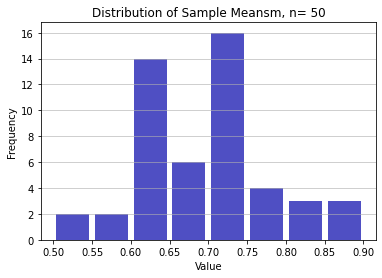

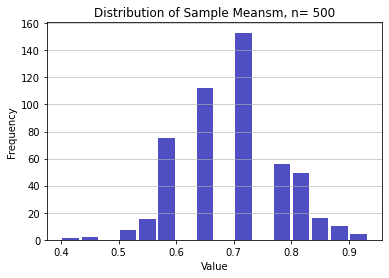

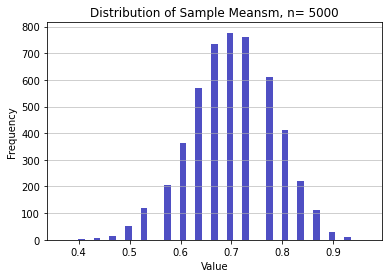

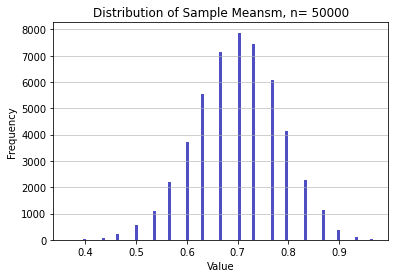

In [11]:
# Central Limit Theorem 
import matplotlib.pyplot as plt


def plot_means(estimand, sample_size, trials):
    # estimand: the data-generating true value (integer)
    # trials: number of the biggest sample size (integer)

    x = np.array([random.binomial(n=1, p=estimand, size=sample_size) for i in range(trials)])
    p_hat = x.sum(axis=1)/sample_size # The mean of the data 
    

    # An "interface" to matplotlib.axes.Axes.hist() method
    n, bins, patches = plt.hist(x=p_hat, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
    plt.grid(axis='y', alpha=0.75)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title('Distribution of Sample Meansm, n= %i' %trials)
    maxfreq = n.max()
    plt.show()
  
plot_means(0.7, 30, 50)
plot_means(0.7, 30, 500)
plot_means(0.7, 30, 5000)
plot_means(0.7, 30, 50000)


If ever unsure about the interpretation of statistics or confidence intervals, or whether the technique you are applying works well with your data, feel free to reach out to anyone in HODP in the slack. We recognize that people have varying degrees of expertise when it comes to statistics and drawing inferences from data, and we would love to help!  

# The Benefits of Large Samples

Sample size is one of the most important considerations in many experiments in statistics. More data is great for a lot of reasons: the Strong Law of Large Numbers states that sample means probabilistically converge to their true means, the central limit theorem starts to take stronger effect as asymptotics kick in, and, anytime either the variance or bias of an estimator is indirectly related to sample size, the mean squared error of an estimator decreases. 

Small sample sizes do not mean that an experiment is worthless; it just means that the statistician must be ever more careful when interpreting results. With this in mind, and the language from above, any statistician is ready to dive into analyzing their data. To help with claims about significance and causality, we have created the next docs: Hypothesis Testing. 

### Example

You are interested in determining the proportion of Harvard students with the Pros. You survey 250 people using a simple random sample. You obtain the following data. You decide to estimate the true proportion of students with the Pros by using the sample mean of your data (as your estimator). 

By writing a few lines of code in the following box, try your best to do the following. If you have a question or run into questions, shoot Asher or Leo a Zoom message! 

1. Estimate the true proportion of students who own AirPod Pros. 
2. Evaluate how confident you are in that estimate. 


In [12]:
# Paramters (do not change)
estimand = 0.98
ss = 1200

# AirPod Pro Data (do not change)
pros = random.binomial(n=1, p=estimand, size=ss)
print(x) 

# Estimate  (TO-DO)

# Confidnce Interval (TO-DO)



[0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 0 1 0 1 0 1 1 1 1 1 1 0 0 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 0 1 1 1 1 1 0
 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1]


 # Hypothesis Testing
 
Hypothesis testing is a way to test and compare the validity of hypotheses.

## Fundumentals

Generally, say that we partition a parameter space $\Theta$ into two disjoint sets $\Theta_0$ and $\Theta_1$. Then we have two hypotheses: 

$H_0 : \theta \in \Theta_0$ and $H_1 : \theta \in \Theta_1$. 

We call $H_0$ the null hypothesis and $H_1$ the alternate hypothesis. 

To test these hypotheses, we need data. Let $X$ be a random variable representing our data. We test a hypothesis by finding a subset of outcomes $R$ in the range of $X$ called the rejection region. If $X \in R$, then we reject the null hypothesis: otherwise, we do not reject the null hypothesis. 


We never accept the null or alternative hypothesis, we only ever reject $H_0$ or retain $H_0$. 

We define the rejection region $R$ as the region where a test statistic $T$ is above a $critical value$: 

$R = {x : T(x) > c }$. 

The problem in hypothesis testing is of finding an appropriate test statistic $T$ and critical value $c$. 

Often, estimation and confidence intervals are better tools than hypothesis testing. Only use hypothesis testing when you want to test a well-defined hypothesis. 

## Errors 

There are two common errors: false positives, also referred to as type I errors, where we reject $H_0$ when $H_0$ is true, and false negatives, or type II errors, when we retain $H_0$ when $H_1$ is true. 


## Power 

The power function of a test with rejection region $R$ is $\beta(\theta) = P(X \in R)$. 

The size of a test is $\alpha = \sup \beta(\theta)$. The supremum of a set is the least upper bound. In other words, the size of a test is the largest probability of rejecting $H_0$ when $H_0$ is true. 

A test has level $\alpha$ if its size is less than or equal to $\alpha$. 

Note: A level $\alpha$ test rejects $H_0 : \theta = \theta_0$ if and only if the $1-\alpha$ confidence interval does not contain $\theta_0$. This is important for two reasons. Consider an example where we have a confidence interval and two values outside the interval, one close and one far. In the first case, the estimated value of $\theta$ is close to $\theta_0$, so the finding is probably of little value. In the second case, the estimated value is far, so the finding has scientific value. This shows that statistical significance does not imply scientific importance, and that confidence intervals can be more informative than tests. 


## P-values 

Often, researchers report more than whether or not they reject or retain the null. Usually, there is a the smallest $\alpha$ at which the test rejects the null: we call this the p-value. 


## Warnings! 

1) If a p-value is large, this has two interpretations: either $H_0$ is true, or $H_0$ is false but the test has low power. A large p-value is not strong evidence in favor of $H_0$.  

2)  The p-value is not the probability that the null hypothesis is true! The p-value is the probability under the null of observing a value of the test statistic the same as or more extreme than what was actually observed. 

3) Hypothesis testing is useful when there is evidence to reject $H_0$. If $H_0$ is the status quo, then this makes sense. We cannot use it to prove that $H_0$ is true. Failure to reject $H_0$ can occur because $H_0$ is true or because the test has low power.

4) P-values are also susceptible to p-hacking. This refers to making assumptions about data or tests that influence the p-value to be more favorable, usually to increase the chance of publication. 

5) As a final point about the problems with p-values, they are susceptible to decisions you make about when to collect data, even if that does not change the data you actually observe. For example, if you toss a coin $n=12$ times and observe  $s = 9$ heads, then if the null hypothesis is that the coin is fair, the one sided test statistic where $t(s) = s$ is 0.073, larger than the marginal 5% threshold.  If instead the modeler kept tossing the coin until they observed $n - s = 3$ tails, then the data-generating distribution becomes negative binomial and under this model and the same null hypothesis we get that the one sided p-value is 0.0327. All of a sudden, without changing the data, there is “significant” evidence of bias in the coin! Long live Bayes :). 



## Observed versus Potential Outcomes
*Causal effect or selection bias?*

When it comes to differences by insurance status, *ceteris* is not *paribus*. A little formal notation makes the difference precise. For each person, indexed by $i$, define two possibilities:
* Health of person $i$ when $i$ is insured: $Y_{1i}$
* Health of person $i$ when $i$ is uninsured: $Y_{0i}$

The causal effect of insurance on person $i$ is 

$$ Y_{1i} - Y_{0i} $$

We can hope to measure the average causal effect, $E[Y_{1i}-Y_{0i}]$, or the effect of *treatment on the treated*, that is $E[Y_{1i}-Y_{0i}|D_i = 1]$, where $D$ is a dummy that is equal to $1$ if the individual is insured. The first tells us if insurance benefits all in the population, on average, while TOT tells us if those in the insured population benefit from *their coverage*. 

Why can't we observe this? Write out TOT as:

$$ E[Y_{1i}-Y_{0i}|D_i=1] = E[Y_{1i}|D_i=1] - E[Y_{0i}|D_i=1] $$

But, we can *never* observe $E[Y_{0i}|D_i=1]$. Why? 

What if we just considered:

$$ E[Y_{i}|D_i=1] - E[Y_{i}|D_i=0] $$

Why is this not satisfying? We have an intuition, but let's quantify this just a bit more. 

$$ E[Y_{i}|D_i=1] - E[Y_{i}|D_i=0] = E[Y_{1i}|D_i=1] - E[Y_{0i}|D_i=0] $$
$$ = E[Y_{1i} - Y_{0i}|D_i=1] + \{E[Y_{0i}|D_i=1] - E[Y_{0i}|D_i=0] \} $$

The naiive difference we computed is the causal effect plus the term in curly brackets, which we call the *selection bias*. Intuitively, it's the additional amount that people without health insurance would have been better off if they had health insurance. 

An aside: it's pretty rare that we'll be able to show causation in a HODP article, so it's important to frame most of our work as a correlation or trend we noticed, rather than as a direct cause. Often, though, it will intuitively make sense that there "should" or at least "could" be a causal connection. In those cases, make sure to frame your writing as a "possible explanation" than as a statement of what is going on. Cite other research on whether such a trend has a causal effect, or to cite relevant quantitative work.

## Random Assignment
Random assignment eliminates selection bias. The insured and uninsured are the same in every other way! Convince yourself of this by looking at the above math if we knew $E[Y_{1i}|D_i=1] = E[Y_{1i}|D_i=0]$. The average causal effect is the same as the average causal effect on the treated. 

### We aren't running experiments! Why did you explain all this?
Randomized research designs are a somewhat unnatainable ideal. We can't often do them. But, by understanding the framework, we can judge our attempts by how closely they're able to shape up. 

The first question to be answered when thinking about causal effects is thus always: *What's the experiment you'd like to do?*

## The RAND Health Insurance Experiment
In the 1970s, researchers at RAND randomly assigned 6,000 people to experimental insurance plans that required either no cost-sharing, a modest deductible, or 25%, 50%, or 95% coinsurance rates on subscribes. For more on this, check out Aron-Dine et. al (2013), which I've put in the repo. 

I've gone through and cleaned the dataset for you. The no cost-sharing "Free" plan is plantype 1, plantype 2 is the "Individual Deductible", plantype 3 are the two "Cost-Sharing", and plantype 4 is the 95% coinsurance "Catastrophic" plan.


Let's import the data and see what happened:

In [13]:
rand = pd.read_csv("randhie_health.csv")
rand.head()

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (284,288) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,person,site,instat,bfamily,bhh,xperson,baseld,enrterm,enrdate,annd,...,cap,capx,pfi,pfix,mhi,mhix,ghindx,ghindxx,merge2,merge3
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,using only (2),master only (1)
1,MA250247,Dayton,1.0,KA100082,JA000082,MA250271,19740618.0,5.0,19750201.0,201.0,...,NaN,100.0,5.0,5.0,95.000000,94.699997,NaN,71.599998,matched (3),matched (3)
2,MA250255,Dayton,1.0,KA100082,JA000082,MA250271,19740618.0,5.0,19750201.0,201.0,...,NaN,100.0,5.0,5.0,93.800003,76.099998,NaN,69.300003,matched (3),matched (3)
3,MA250263,Dayton,1.0,KA100082,JA000082,MA250271,19740618.0,5.0,19750201.0,201.0,...,NaN,100.0,5.0,5.0,98.699997,96.800003,NaN,92.000000,matched (3),matched (3)
4,MA250271,Dayton,1.0,KA100082,JA000082,MA250271,19740618.0,5.0,19750201.0,201.0,...,NaN,100.0,5.0,5.0,96.300003,80.300003,NaN,73.900002,matched (3),matched (3)


## Impact?
Did those on the "free" plan become healthier? Let's find out: compare ghindxx, a measure of health at exit of the survey, across the "Catastrophic" and "Free" groups. 

In [21]:
free = rand[rand.plantype == 1]
catastrophic = rand[rand.plantype == 4]

# difference in means 

# we need to drop NaNs here, so add .dropna() to the two subgroups you're comparing 

# Generate a confidence interval for the difference



## Life and death?

Economists before RAND believed that health spending was inelastic, that is, you went to the hospital when you *needed* to, it didn't vary depending on what it cost. (Why is this important?)

Did giving people healthcare make them spend more on insurance? Run a t test where you compare plantype 1 and 4, for instance, using hosp_spend, which is the sum of in-patient and out-patient spending.

What if we just look at in-patient (inpdol) spending? Why might that be different? 

Why might we care about this? How would you report these results?

In [10]:
rand = pd.read_csv("randhie_spending.csv")
rand.head()

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (73,123,275,279) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,person,year,spending,inp,out,out_rand,mental,mdcl,drugs,supplies,...,mde,coins,coins_dental,inpdol,outpdol,meddol,totadm,outsum,hosp_spend,plantype
0,MA250247,1,14.35,0.0,14.35,14.35,0.0,14.35,14.35,0.0,...,1000.0,1.00,1.00,0.0,0.0,14.35,0.0,14.35,14.35,4
1,MA250247,2,115.15,0.0,115.15,115.15,0.0,115.15,24.65,0.0,...,1000.0,0.95,0.95,0.0,90.5,115.15,0.0,115.15,115.15,4
2,MA250247,3,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.0,...,1000.0,0.95,0.95,0.0,0.0,0.00,0.0,0.00,0.00,4
3,MA250247,4,110.00,0.0,110.00,0.00,0.0,0.00,0.00,0.0,...,1000.0,0.95,0.95,0.0,0.0,0.00,0.0,0.00,0.00,4
4,MA250247,5,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.0,...,1000.0,0.95,0.95,0.0,0.0,0.00,0.0,0.00,0.00,4


In [3]:
# Write a t-test comparing hosp_spend across plantypes here 

# Generate a confidence interval for the difference

In [8]:
# now compare indpol

In [9]:
# construct a confidence interval for the difference in hosp_spend or impdol! 

## Basic Regression
Regression is a very useful tool for prediction. Linear regressions allow us to easily model a linear relationship between a response/dependent/Y variable and 1 or more predictor/independent/X variables. We define the regression of $Y$ on $X$ as the *best linear predictor* of $Y$ given $X$. 

Formally, we define regression as the minimum mean squared error for the expression $E[Y_i - \alpha - \beta X_i]^2$. We can define $\beta$ as $\text{cov}(X_i,Y_i)/\text{var}(X_i)$, and $\alpha$ as $E[Y_i] - E[X_i]\beta$. To prove this, just take a derivative of our MSE equation and solve for the unknowns! Regression has some very nice mathematical properties that we won't go into here. If you plan to use regression in your project, please come talk to us for a more in depth treatment of the subject!

Regressions in Python are fairly easy to do: we just need a Y list, and at least one X list of equal length! Note that we'll need to reshape the data a bit first.

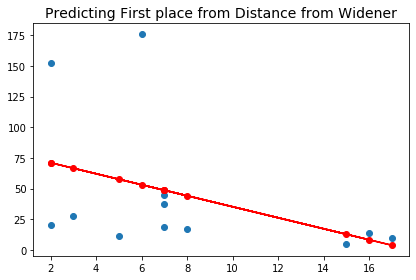

80.00570187347272 [-4.48493076]
[-0.41418385]
(-0.414183846812948, 0.18070743478976728)


In [14]:
from sklearn import linear_model
import statsmodels.api as sm
from scipy.stats.stats import pearsonr

lm = linear_model.LinearRegression()
rankings = pd.read_csv("house_rankings_2018.csv")
houses = rankings.House
rankings.set_index("House", inplace = True)

#walking time from Widener Library (in minutes), from Google Maps
dist = [2, 15, 7, 8, 3, 5, 7, 16, 7, 2, 17, 6]

# Reshape distances as a column vector
dist_reshaped = np.array(dist).reshape(-1,1)
first_place = [rankings.values[i,0] for i in range(0, 12)]

#X, Y is the order
reg = lm.fit(dist_reshaped, first_place)
beta0, beta1 = reg.intercept_, reg.coef_
y_predict = np.multiply(dist_reshaped,beta1) + beta0

fig, ax = plt.subplots(1, 1, sharey=True, tight_layout=True)
ax.scatter(dist_reshaped, first_place)
plt.plot(dist_reshaped, y_predict, '-o',color='r')
ax.set_title("Predicting First place from Distance from Widener", fontsize=14)
plt.show()
print(beta0, beta1)

# Demystifying Beta1
covariance = beta1 * np.var(dist) 
cor = covariance / (np.std(dist) * np.std(first_place))
print(cor)
print(pearsonr(first_place, dist))

You can also do this a slightly different way using an OLS object to get more information. You just have to further reformat your data. 

In [15]:
dist_reshaped_ols = sm.add_constant(dist_reshaped)
mod = sm.OLS(first_place,dist_reshaped_ols)
results = mod.fit()
results.summary()

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.172
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     2.071
Date:                Fri, 28 Feb 2020   Prob (F-statistic):              0.181
Time:                        19:04:16   Log-Likelihood:                -63.934
No. Observations:                  12   AIC:                             131.9
Df Residuals:                      10   BIC:                             132.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         80.0057     29.279      2.733      0.021      14.768     145.243
x1            -4.4849      3.117     -1.439      0.181     -11.429       2.460
==============================================================================
Omnibus:                        8.123   Durbin-Watson:                   1.092
Prob(Omnibus):                  0.017   Jarque-Bera (JB):                4.173
Skew:                           1.378   Prob(JB):                        0.124
Kurtosis:                       3.864   Cond. No.                         17.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Interpreting your Coefficients
In simple regression, we can interpret the coefficients easily. In this case, the coefficient 1.468 is the change in Leverett ratings for a one unit change in Boston temperature. 

The coefficient -42.97 is the predicted number of Leverett ratings if the monthly high temperature in Boston was 0. 

### Aside: Demystifying Beta_1 
Somewhat unsurprisingly, there is a relationship between beta_1 and your correlation. It turns out, if your X's and Y's are standardized, then your correlation coefficient is equal to your beta_1 coefficient. You can actually get from beta1 to the correlation coefficient really easily by doing some simple algebra. 


In [16]:
# Demystifying Beta1
covariance = beta1 * np.var(dist) 
cor = covariance / (np.std(dist) * np.std(first_place))
print(cor)
print(pearsonr(first_place, dist)[0])

[-0.41418385]
-0.414183846812948


## Assumptions
* Linearity
* Equal Spread 
* Normality of Errors
* Independence of assumptions

We can check the first three of these with a plot of our linear model and a plot of the residuals versus the predicted value. These plots are given below. We can see from the plots that there's a problem. Well two, actually. There are clearly two outliers throwing everything off!

Into the weeds about the plots: From the first plot, we see that there appear to be two outliers - influential points - that are skewing our model. The residual histogram seems to make our normality of errors assumption questionable, but that's mostly caused by the outliers as well. Our residuals vs. predicted plot looks terrible as well because of these two outliers. Although there's no obvious pattern in our residuals, they don't appear to have equal spread. 

Take a Stats course for more clarity on the assumptions. If you don't get all of this, that's okay. You'll never put this in your article, but I would feel like I'm committing statistical malpractice if I didn't at least make you aware of the assumptions regarding regression. 

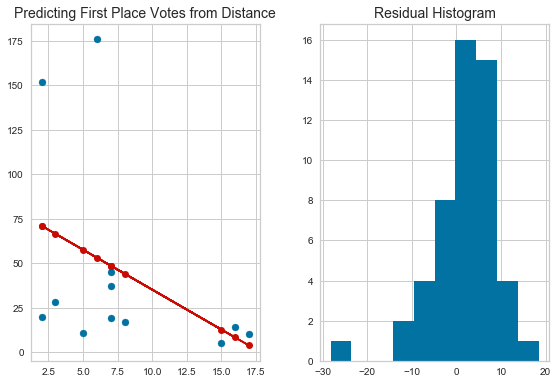

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 3 is different from 1)

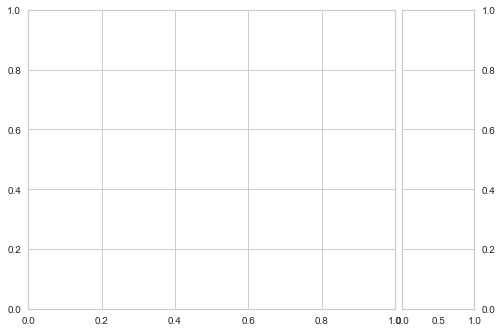

In [28]:
from yellowbrick.regressor import ResidualsPlot
fig, ax = plt.subplots(1, 2, tight_layout=True)
ax[0].scatter(dist_reshaped, first_place)
ax[0].plot(dist_reshaped, y_predict, '-o',color='r')
ax[0].set_title("Predicting First Place Votes from Distance", fontsize=14)
ax[1].hist(results.resid)
ax[1].set_title("Residual Histogram", fontsize=14)
plt.show()

visualizer = ResidualsPlot(reg)
visualizer.fit(dist_reshaped, first_place)
visualizer.show()

Now, let's investigate those outliers

In [29]:
rankings['dist'] = dist 
rankings

,1,2,3,4,5,6,7,8,9,10,11,12,dist
House,,,,,,,,,,,,,
Adams,20,15,24,38,37,44,67,75,74,28,32,80,2
Cabot,5,13,16,17,7,20,16,31,49,118,148,94,15
Kirkland,19,19,35,50,71,63,72,70,56,24,24,31,7
Mather,17,15,19,25,27,40,44,67,112,37,55,76,8
Quincy,28,43,55,90,71,82,65,44,21,17,14,4,3
Leverett,11,22,40,73,76,81,94,66,36,18,11,6,5
Dunster,45,67,113,56,70,42,44,52,19,10,11,5,7
Currier,14,10,16,15,18,19,20,23,43,92,114,150,16
Eliot,37,57,60,67,57,76,49,40,38,23,16,14,7


The outliers are Lowell and Winthrop! I suspect that the recent renovations are causing these two houses to have lots of first place votes despite their distances from Widener. If only there was some way to control for renovations...

## Multiple Regression (and matching)

We can also run a regression model with more than one predictor variables. All you have to do is add the predictors to your design matrix X and use the lm.fit() command. This allows us to control for confounding variables.

What's going on here? Think about it this way. We replace the unconditional comparison

$$ E[Y_i | X_{1i} = 1] - E[Y_i | X_{1i} = 0] $$

With a set of conditional comparisons, 

$$ E[Y_i | X_{1i} = 1, X_{2i} = x] - E[Y_i | X_{1i} = 0, X_{2i} = x] $$

That is, we look at $Y$ given $X_{1i}$ *conditional on* $X_{2i} = x$. Note this takes on as many values as there are values of $X_2$.

Here, I've fitted a model to predict number of first-choice votes each house received, with two predictor variables. I've given you two possible variables below, though you're welcome to find more, or different ones. Again, note that you may need to reshape data.

*Hint: You still need to find the dependent variable, and structure it like the `levCounts` variable above.*

In [30]:
#walking time from Widener Library (in minutes), from Google Maps
dist = [2, 15, 7, 8, 3, 5, 7, 16, 7, 2, 17, 6]
#was the house renovated in last 10 years? 1 if true
renovated = [0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1]

X = np.matrix([dist, renovated]).transpose()
Y = [rankings.values[i,0] for i in range(0, 12)]
Y = np.array([Y]).reshape(-1, 1)

reg = lm.fit(X, Y)
[reg.intercept_, reg.coef_]

[array([31.89518947]), array([[-1.40647675, 56.9746036 ]])]

Again, you can do this using an OLS Object as well with properly formatted data. 

In [31]:
X_ols = sm.add_constant(X)
mod = sm.OLS(Y,X_ols)
results = mod.fit()
results.summary()

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.354
Model:                            OLS   Adj. R-squared:                  0.210
Method:                 Least Squares   F-statistic:                     2.464
Date:                Sun, 01 Mar 2020   Prob (F-statistic):              0.140
Time:                        13:34:31   Log-Likelihood:                -62.443
No. Observations:                  12   AIC:                             130.9
Df Residuals:                       9   BIC:                             132.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         31.8952     40.678      0.784      0.453     -60.125     123.916
x1            -1.4065      3.486     -0.403      0.696      -9.292       6.479
x2            56.9746     35.759      1.593      0.146     -23.918     137.867
==============================================================================
Omnibus:                        1.891   Durbin-Watson:                   0.921
Prob(Omnibus):                  0.388   Jarque-Bera (JB):                0.658
Skew:                           0.572   Prob(JB):                        0.720
Kurtosis:                       3.089   Cond. No.                         32.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Now let's plot our prediction lines again.

[31.89518947 -1.40647675 56.9746036 ]


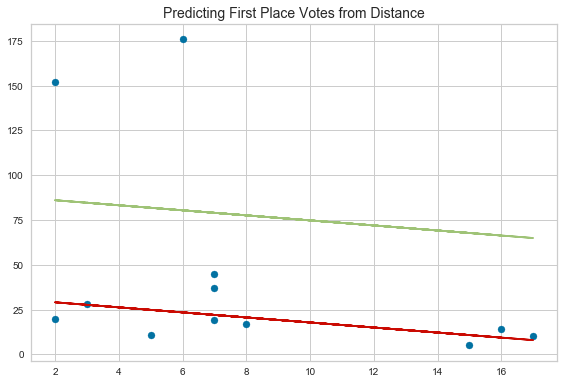

In [32]:
#X, Y is the order
coef = results.params
print(coef)
y_predict = np.multiply(dist_reshaped,beta1) + beta0

x = np.linspace(1,17,100)
y_0 = coef[1]*dist_reshaped+coef[0]
y_1 = (coef[1])*dist_reshaped + coef[0] + coef[2]

fig, ax = plt.subplots(1, 1, tight_layout=True)
ax.scatter(dist_reshaped, first_place)
ax.plot(dist_reshaped, y_0, '-',color='r')
ax.plot(dist_reshaped, y_1, '-',color='g')
ax.set_title("Predicting First Place Votes from Distance", fontsize=14)
plt.show()

Obviously, this helped a lot. 

## Interpreting your Coefficients
In multiple regression, we control for certain variables by introducing them as predictors. In this case, the coefficient -1.4065 is the change in first-place votes for a one unit change in distance from Widener library controlling for whether or not a house has been renovated. 

The coefficient 56.9746 is the change in first-place votes for a one unit change in the renovations indicator variable holding distance from Widener library constant. In other words, if a house is renovated, we can expect a 56.9746 increase in first-place votes, controlling for distance to Widener. 

Sometimes, we have coefficients whose interpretations don't really make that much sense or that aren't really useful. For example, the coefficient 31.8952 is the expected number of first place votes that a non-renovated house 0 minutes from Widener would receive. While this isn't hard to interpret, it's not that useful unless Harvard was thinking about bulldozing Widener to build a new house. 

### Prediction
Finally, one of the most useful things we can do with a predictive model is make predictions! Assuming you called your model `reg`, use the command below to predict the number of first choice votes for Adams House after the renovations.

In [33]:
reg.predict(np.array([[2, 1]]))

array([[86.05683956]])

## Your Turn
Let's return back to our healthcare example. With our knowledge of potential outcomes, we should be ready to take on some more sophisticated analyses! First, just regress health insurance (hi) on health (hlth). Then, add age, years of education, and income to our comparison of health between the insured and uninsured.

Recall that in the NHIS dataset, health insurance is 1 if you have it and 0 if you do not, years of education is yedu, and employment and income are empl and inc.

How do our estimates change?

If you finish, trying adding the same to our RAND comparison. Does it change our estimates there?

In [ ]:
# Run this to clean up the dataset a bit more
nhis = nhis[nhis['age'].apply(lambda x: str(x).isdigit())]
nhis = nhis.dropna(subset=['hi', 'age', 'inc', 'yedu', 'empl', 'hlth'])

In [22]:
import statsmodels.api as sm

## TODO ##
